# 생선분류
- 최적의 k찾기 : 하이퍼파라미터 
    - 데이터셋 : fish.csv
    - 피쳐/특성 : Weight, Length
    - 타겟/라벨 : Species 
    - 학습방법 : 지도학습 -> 분류
    - 학습알고리즘 : 최근접이웃알고리즘(KNN)
    - 하이퍼파라미터 튜닝 : 모델 성능 개선

## [1] 데이터 준비

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
DATA_FILE = '../data/fish.csv'

In [31]:
# 행 : Bream, Smelt 컬럼 : Species, Weight, Length => 0,1,2
fish_df = pd.read_csv(DATA_FILE)
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [32]:
fish_df.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [33]:
mask = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
two_df = fish_df[mask].copy()
two_df.reset_index(drop=True, inplace = True)
two_df.index

RangeIndex(start=0, stop=49, step=1)

In [34]:
# Species 컬럼 수치화 
# -> Bream 0, Smelt 1
two_df['fcode'] = two_df.loc[:,'Species'].replace({'Bream':0, 'Smelt':1})

## [2] 피쳐와 타겟 분리

In [35]:
features = two_df[['Weight','Length']]
target = two_df['fcode']

print(f'featrues -> {features.shape}, {features.ndim}D')
print(f'target -> {target.shape}, {target.ndim}D')

featrues -> (49, 2), 2D
target -> (49,), 1D


## [3] 데이터셋 준비 -> 학습용, 테스트용

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# train : test = 80 : 20
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=10) 
# test_size에 값을 지정하면 train_size는 1-test_size

In [38]:
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (39, 2), 2D
y_train : (39,), 1D
x_test : (10, 2), 2D
y_test : (10,), 1D


In [39]:
y_train.value_counts()

fcode
0    28
1    11
Name: count, dtype: int64

In [40]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [41]:
y_test.value_counts()

fcode
0    7
1    3
Name: count, dtype: int64

In [42]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

## [3-2] 피쳐 스케일링
- 피쳐들 간의 범위 정규화 ( 0 ~ 1 )

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
# 스케일러 인스턴스 생성 

mm_scaler = MinMaxScaler()

In [45]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행 
mm_scaler.fit(x_train)

MinMaxScaler()

In [46]:
mm_scaler.min_, mm_scaler.data_min_ # x_train에서 Weight : 6.7, Length : 9.8이 최소값 

(array([-0.00674519, -0.31410256]), array([6.7, 9.8]))

In [47]:
mm_scaler.scale_, mm_scaler.data_max_ # x_train에서 Weight : 1000, Length : 41이 최대값

(array([0.00100675, 0.03205128]), array([1000.,   41.]))

제공한 데이터는 xxx.data_min(max)_ 안에 들어감

In [48]:
# 학습용 데이터 셋 -> 스케일링 ->> ndarray로 변경 

x_train_scaled = mm_scaler.transform(x_train)
x_train_scaled.shape

(39, 2)

In [49]:
x_train_scaled.min(), x_train_scaled.max()

(0.0, 1.0000000000000002)

In [50]:
# 테스트용 데이터 셋 -> 스케일링 ->> ndarray로 변경  

x_test_scaled = mm_scaler.transform(x_test)
x_test_scaled.shape

(10, 2)

In [51]:
x_test_scaled.min(), x_test_scaled.max()

(0.0033222591362126247, 0.8489882210812445)

## [4] 학습/훈련

In [52]:
# 모듈 로딩 
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# 인스턴스 생성 
model = KNeighborsClassifier() # 모델 생성

In [54]:
# 학습 진행 -> 학습용 데이터셋 
model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [55]:
# 학습 후 모델 파라미터 
model.classes_, model.feature_names_in_, model.n_samples_fit_

# model.feature_names_in_ : ndarray면 column 명 안 나옴 -> error

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_names_in_'

In [ ]:
# 학습 후 모델 파라미터 
model.classes_, model.n_samples_fit_

(array([0, 1], dtype=int64), 39)

## [5] 모델 성능 평가
-> score() 메서드 + 테스트 데이터셋

In [ ]:
model.score(x_test_scaled, y_test)

1.0

In [ ]:
model.score(x_train_scaled, y_train)

1.0

## [6] 최적의 k 개수 찾기
-> 모델의 성능 영향 미치는 파라미터

In [67]:
# k의 범위 : 1 ~ 전체 데이터 개수 

scores = []
points = [] # 달라지는 시점만 넣기 위함 

for k in range(1,40):
    # 최근접 이웃 데이터 수 설정 
    model.n_neighbors = k # 속성값으로 새로운 값이 들어오면 변경 ㅇ 

    # 모델 예측 값 추출 - 생략 ㅇ 
    # model.fit(x_train_scaled,y_train)

    # 점수 계산 
    jumsu = model.score(x_test_scaled, y_test)
    print(f'[{k}] jumsu -> {jumsu}') 

    if k>1: # 1개는 비교할 수 없으므로 2개부터 
        if jumsu != scores[-1]:
            points.append(k) # 위치를 알기 위해 k 추가 
    scores.append(jumsu)

print(f'points : {points}')

[1] jumsu -> 1.0
[2] jumsu -> 1.0
[3] jumsu -> 1.0
[4] jumsu -> 1.0
[5] jumsu -> 1.0
[6] jumsu -> 1.0
[7] jumsu -> 1.0
[8] jumsu -> 1.0
[9] jumsu -> 1.0
[10] jumsu -> 1.0
[11] jumsu -> 1.0
[12] jumsu -> 1.0
[13] jumsu -> 1.0
[14] jumsu -> 1.0
[15] jumsu -> 1.0
[16] jumsu -> 1.0
[17] jumsu -> 1.0
[18] jumsu -> 1.0
[19] jumsu -> 1.0
[20] jumsu -> 1.0
[21] jumsu -> 1.0
[22] jumsu -> 0.7
[23] jumsu -> 0.7
[24] jumsu -> 0.7
[25] jumsu -> 0.7
[26] jumsu -> 0.7
[27] jumsu -> 0.7
[28] jumsu -> 0.7
[29] jumsu -> 0.7
[30] jumsu -> 0.7
[31] jumsu -> 0.7
[32] jumsu -> 0.7
[33] jumsu -> 0.7
[34] jumsu -> 0.7
[35] jumsu -> 0.7
[36] jumsu -> 0.7
[37] jumsu -> 0.7
[38] jumsu -> 0.7
[39] jumsu -> 0.7
points : [22]


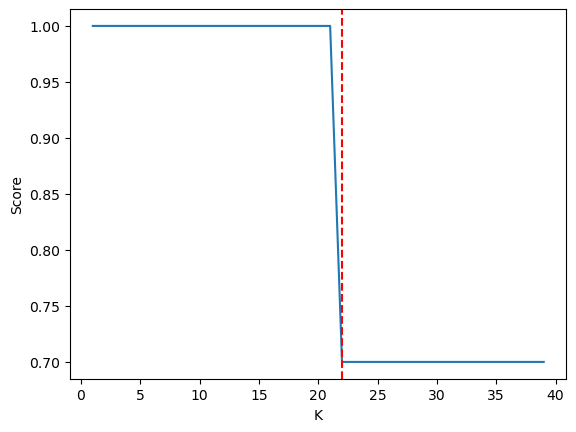

In [73]:
# x축 : k, y축 : jumsu 

plt.plot(range(1,40), scores)
plt.axvline(points[0],0.0,1.0 ,color='red', linestyle = 'dashed') # x축에 수직으로 선 그음 (vertical) # 0.0, 1.0 : y의 최소, 최대 
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

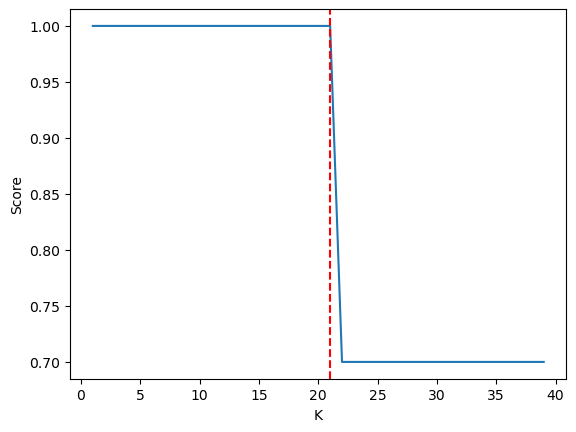

In [74]:
# x축 : k, y축 : jumsu 

plt.plot(range(1,40), scores)
plt.axvline(points[0]-1,0.0,1.0 ,color='red', linestyle = 'dashed') 
# before 지점을 찾기 위해 -1
plt.xlabel('K')
plt.ylabel('Score')
plt.show()   

-> k가 커지면 정확도가 떨어짐

## [7] 예측하기 
-> 학습/훈련과 테스트에 사용되지 않은 데이터 사용

- 주의 : 입력 데이터 : 2D 

In [ ]:
new_data = pd.DataFrame([[413,27.8]], columns=['Weight', 'Length'])
new_data

,Weight,Length
0,413,27.8


In [ ]:
new_data_sclaed = mm_scaler.transform(new_data)
new_data_sclaed

array([[0.40904057, 0.57692308]])

In [ ]:
# 임의의 새로운 데이터 예측
model.predict(new_data_sclaed)

array([0], dtype=int64)

In [ ]:
## 최근접한 k개 데이터 찾기 
distance, index = model.kneighbors(new_data_sclaed)

In [ ]:
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703]])

In [ ]:
index

array([[25, 22, 21,  0,  6]], dtype=int64)

In [ ]:
neighbors = index.reshape(-1).tolist() # index가 2차원이라서 reshape
neighbors 

[25, 22, 21, 0, 6]

In [ ]:
x_train_scaled[neighbors]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [ ]:
x_train_scaled[neighbors].shape

(5, 2)

In [ ]:
x_train_scaled[neighbors][0,0]

0.4261552401087285

In [ ]:
k_weight = x_train_scaled[neighbors][:,0]
k_weight

array([0.42615524, 0.35870331, 0.44629014, 0.38588543, 0.44629014])

In [ ]:
k_length = x_train_scaled[neighbors][:,1]
k_length

array([0.61538462, 0.61538462, 0.63782051, 0.6474359 , 0.6474359 ])

In [ ]:
print(new_data_sclaed)
print()
print(k_weight, k_length, sep='\n')

[[0.40904057 0.57692308]]

[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


## [6] 시각화

In [ ]:
new_data_sclaed

array([[0.40904057, 0.57692308]])

In [ ]:
new_data_sclaed=new_data_sclaed.reshape(-1)
new_data_sclaed

array([0.40904057, 0.57692308])

In [ ]:
x_train_scaled

array([[3.85885432e-01, 6.47435897e-01],
       [3.12091010e-03, 7.05128205e-02],
       [2.85210913e-01, 5.28846154e-01],
       [5.53709856e-03, 1.02564103e-01],
       [9.54696466e-01, 9.19871795e-01],
       [1.32890365e-02, 1.66666667e-01],
       [4.46290144e-01, 6.47435897e-01],
       [1.00000000e+00, 8.71794872e-01],
       [0.00000000e+00, 0.00000000e+00],
       [6.97976442e-01, 7.43589744e-01],
       [4.71458774e-01, 6.79487179e-01],
       [6.47639183e-01, 7.59615385e-01],
       [4.96627404e-01, 6.95512821e-01],
       [3.02023558e-04, 2.56410256e-02],
       [6.82875264e-01, 7.75641026e-01],
       [3.12091010e-03, 4.48717949e-02],
       [7.18111346e-01, 8.07692308e-01],
       [3.35548173e-01, 5.35256410e-01],
       [9.24494111e-01, 9.51923077e-01],
       [3.02023558e-03, 3.84615385e-02],
       [6.74519279e-03, 8.33333333e-02],
       [4.46290144e-01, 6.37820513e-01],
       [3.58703312e-01, 6.15384615e-01],
       [6.07369375e-01, 7.59615385e-01],
       [6.778415

In [ ]:
x_train_scaled[:,0]

array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
       9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
       0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
       4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
       7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
       6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
       6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
       2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
       8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
       4.96627404e-01, 3.35548173e-01, 9.49662740e-01])

In [ ]:
x_train_scaled[:,1]

array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
       0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
       0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
       0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
       0.08333333, 0.63782051, 0.61538462, 0.75961538, 0.80769231,
       0.61538462, 0.80769231, 0.06410256, 0.04807692, 0.63782051,
       0.77564103, 0.79166667, 0.0224359 , 0.71153846, 1.        ,
       0.91987179, 0.67948718, 0.71153846, 1.        ])

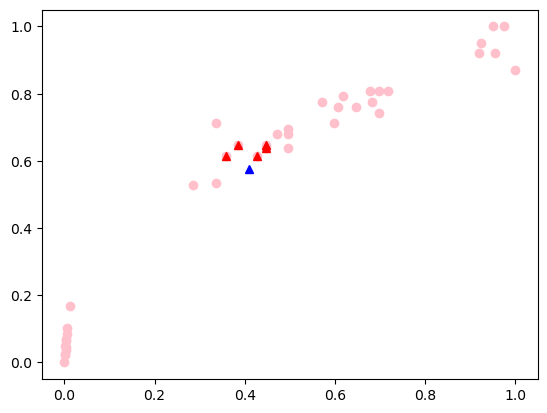

In [ ]:
# 시각화로 확인 

# 도미, 방어에 대한 시각화 

# plt.scatter(two_df.loc[:34,'Weight'],two_df.loc[:34,'Length'], color = 'pink') # Bream
# plt.scatter(two_df.loc[35:,'Weight'],two_df.loc[35:,'Length'], color = 'limegreen') # Smelt

# 이제는 도미, 방어를 따로 할 필요 x 

plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1],color = 'pink')

plt.plot(new_data_sclaed[0], new_data_sclaed[1], 'b^')

plt.plot(k_weight,k_length, 'r^')
plt.show()